---
title: "Lesson 1"
fig-cap-location: bottom
---

{{< video https://www.youtube.com/embed/8SF_h3xF3cE >}}

---

## Introduction

Welcome to Practical Deep Learning For Coders!

This is the fifth version of the course.

It’s the first new one that has been done in 2 years since the previous version in 2020 and a lot of cool new things have come up along the way to cover.

![*fast.ai 2022*](images/lesson_1/practical_deep_learning_for_coders_2022)

---

## A Big Jump Since 2015

It is amazing how much things have changed.

Below is an [xkcd](https://xkcd.com/) (highly popular among most coders and alike) comic from the end of 2015 which depicts the situation back then.

![*An xkcd joke*](images/lesson_1/xkcd_joke)

It can be hard to tell what’s easy and what’s impossible in computing.

In 2015 it was nearly impossible to create a code that can check if an image is of a bird or not! So impossible that it became the idea of a joke.

Now in 2022, we can pull it off for free in under 2 minutes.

---


## Is It A Bird?

The following Python code does it for us.

:::{.callout-note}
Below we run the code very quickly without discussing the nitty-gritty details of the code. We shall come back to it later as we go along.
::: 

In [1]:
!pip install -Uqq fastbook duckduckgo_search

     |████████████████████████████████| 719 kB 15.9 MB/s 
     |████████████████████████████████| 5.3 MB 64.1 MB/s 
     |████████████████████████████████| 1.3 MB 54.5 MB/s 
     |████████████████████████████████| 441 kB 73.1 MB/s 
     |████████████████████████████████| 1.6 MB 55.1 MB/s 
     |████████████████████████████████| 62 kB 1.6 MB/s 
     |████████████████████████████████| 96 kB 7.3 MB/s 
     |████████████████████████████████| 212 kB 62.9 MB/s 
     |████████████████████████████████| 115 kB 73.9 MB/s 
     |████████████████████████████████| 163 kB 77.0 MB/s 
     |████████████████████████████████| 127 kB 74.0 MB/s 
     |████████████████████████████████| 115 kB 76.5 MB/s 
     |████████████████████████████████| 7.6 MB 67.3 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires click<8.0,>=5.1, but you have click 8.1.3 which is inc

Whenever using a cloud platform like Colab or JNs in Kaggle, it is a good practice to have this cell at the top. Running the above cell makes sure that the most recent version of any library/software is used. Older versions can run into some problems of not running smoothly and cause trivial errors.

More info on `pip` and `-Uqq` [here](technical_glossary.qmd).

In [2]:
from fastbook import *

We import all the libraries from `fastbook` using `import`.

In [3]:
urls = search_images_ddg('bird photos', max_images=1)
len(urls), urls[0]

(1,
 'http://www.saga.co.uk/contentlibrary/saga/publishing/verticals/home-and-garden/gardening/garden-wildlife/galleries/exotic-birds/hoopoe.jpg')

Here we are searching in DuckDuckGo for images of birds and grabbing one of them. The URLs are stored in the variable `urls`.

The number of URLs(which is just `1`) and the URL of the first image that we grabbed is outputted.

In [4]:
dest = Path('bird.jpg')
if not dest.exists(): download_url(urls[0], dest, show_progress = False)

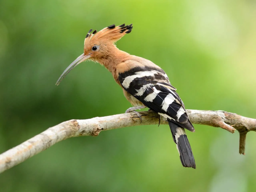

In [5]:
im = Image.open(dest)
im.to_thumb(256, 256)

We download the image.

So, the above script is something that can download images of birds (or anything for that matter) from the internet.

Our goal is to build a system that can recognize images that are birds or not birds. Computers or models need numbers as inputs to work with. Luckily images are indeed made of numbers.

[PixSpy](https://pixspy.com/) is an online viewer which helps us see these numbers in an image.

What we recognize as a bird photo is basically a set of pixels with RGB values.

In [6]:
searches = 'forest','bird'
path = Path('bird_or_not')

if not path.exists():
    for o in searches:
        dest = (path/o)
        dest.mkdir(exist_ok=True, parents = True)
        results = search_images_ddg(f'{o} photo')
        download_images(dest, urls=results[:200])
        resize_images(dest, max_size=400, dest=dest)

To train our model, we need images of birds and "non-birds", but DuckDuckGo or Google doesn’t show images of "non-birds". So, we went with something like images of forests.

In the searches, we went and searched for forest images and bird images, and then downloaded and resized them, about 200 of them each.

We are resizing it to small pixels because computers take a large amount of time to just open an image that is larger in size.

In [7]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink);

When we download images we often get a few broken ones.

A model does not work successfully with broken images.

The above piece of code finds and veriefies these broken images and unlinks them.

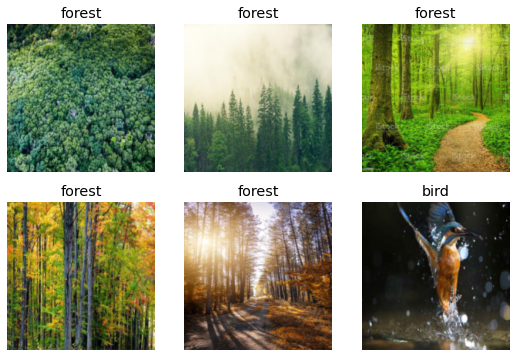

In [8]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

Now, we create what is called a data block.

Data block gives fast.ai library all the information of an image that it needs to create a computer vision model. It gets all the image files that we downloaded and shows us some, let us say 6. We can easily check the data with this.

So now we have downloaded 200  images of birds and forests each and have checked them.

In [9]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:284: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f370

  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,0.399772,0.099666,0.026316,00:09


epoch,train_loss,valid_loss,error_rate,time
0,0.040566,0.008731,0.000000,00:02
1,0.028078,0.019985,0.013158,00:02
2,0.025392,0.014752,0.013158,00:02


Here, the model learns it. This now runs through every photo from the 400 photos and learns about how a bird or a forest looks like.

Overall it took under 30 s which was enough to finish doing what we saw in the comic.

In [10]:
is_bird,_,probs = learn.predict(PILImage.create('bird.jpg'))
print(f"This is a: {is_bird}.")
print(f"Probability it's a bird: {probs[0]:.4f}")

This is a: bird.
Probability it's a bird: 0.9999


By passing in our own image, we can check if an image is a bird or not with the probability rounded to the nearest to 4 decimal places. Here we have passed the first image of bird we downloaded at the beginning.

Hence, something extraordinary has happened since 2015, something which was considered nearly impossible. What was once a joke, can now be done on our laptop in under 2 minutes.

---

## Key Takeaway From The Model We Ran

Clearly, creating real-world deep learning working codes does not require:

* Much Code
* Much Math
* Much Time
* Much Data
* Expensive Computers

Hence, doing DL is pretty much accessible to everyone.

---

## Deep Learning & The Current World Around Us

DL is evolving rapidly, thereby giving rise to various new stuff. Following are some recent developments that came about a few weeks before the start of this course.

### Deep Learning & Art

* [DALL.E 2](https://openai.com/dall-e-2/), is an AI that can create real artistic images based on the descriptions we give it.
  ![*DALL.E 2 Illustrations from twitter*](images/lesson_1/dl_art_illustration_1)
  ![*DALL.E 2 Illustrations from twitter*](images/lesson_1/dl_art_illustration_2)
* [Midjourney](https://www.midjourney.com/home/), is another similar platform.
  ![*Midjourney Illustrations from twitter*](images/lesson_1/dl_art_illustration_3)
* Self motivated artists use DL to create their own art working on a project for months.
  ![*Midjourney Illustrations from twitter*](images/lesson_1/dl_art_illustration_4)

Many [fast.ai](fast.ai) alums having a background in art have went on to create wonderful arts using DL.

### Deep Learing & Language

* [Pathways Language Model (PaLM)](https://ai.googleblog.com/2022/04/pathways-language-model-palm-scaling-to.html) from Google can take an English text/question as an input and return its output an answer with the explanation or “thinking”. The diversity is vast ranging from Math problems to explaining jokes and beyond.
  ![*PaLM*](images/lesson_1/palm)

In short, DL is doing a lot that we would have considered impossible otherwise.

---

## Importance Of Ethics

An important aspect to keep in consideration when venturing into solving and doing these cool things is Ethics. This will be touched upon in the course, but there is a full ethics course called [Practical Data Ethics](https://ethics.fast.ai/) taught by Dr. Rachel Thomas, the co-founder of [fast.ai](fast.ai) that covers things in detail.

---

## Jeremy's Explorations In Education

Apart from being an AI Researcher, Jeremy is a homeschooling primary school teacher. This has led him to study education and bring the best education practices into his classrooms.

---

## Coloured Cups

One of these practices is the *Coloured Cups* practice taken from an educator [Dylan Wiliam](https://www.dylanwiliam.org/Dylan_Wiliams_website/Welcome.html) which is an effective way for a teacher to get an idea of the classroom's understanding of the lesson or a topic as it is being taught.

The idea is simple! All the students in the classrooms have 3 cups, a green cup, a yellow cup, and a red cup each reflecting various levels of understanding. Green means the student is understanding well, yellow means s/he is not quite sure what is going on, and red means the student has no idea of what is going on. As the lesson is being taught, the students put a cup on their desks and the teacher can see the classroom to get a sense of how the students are following along.

For this course, a [virtual setup](https://cups.fast.ai/fast) was made and Jeremy could see it from his end on the [teacher version](https://cups.fast.ai/fast/teacher).

The above site was made by Radek one evening, one of the top Fast.ai alums and TA for the course. More about him covered in [Lesson 0](lesson0.qmd).

![*fast.ai version of the "Colored Cups"*](images/lesson_1/colored_cups_fastai)

### Takeaway

As a learner, it is quite helpful to be self-aware of our situation. Hence, when taking the course independently, we can constantly ask ourselves how we are on the level of understanding.

When we are at red the level, it is better to approach the forums and ask questions.

---

## A Very Different Approach To Doing fast.ai

We began this course, by jumping right in by running a model. We did not do an in-depth review of Linear Algebra and Calculus.

This way of teaching is influenced by Jeremy’s two of the favourite educators [Dylan Wiliam](https://www.dylanwiliam.org/Dylan_Wiliams_website/Welcome.html) and Paul Lockhart (and many others), who claim that learning with a context at hand makes it much better for the learner to learn.

![*Education/learning resources*](images/lesson_1/education_philosophies)

The way we learn math at school in a very dull way is first we learn counting, then adding, then decimals, blah blah blah and 15 years later in grad-school we do the actual cool stuff. This is not the way most people learn effectively.

The best way to learn is the way we learn sports. We jump right in on the ground and start playing it instead of sitting in a classroom and studying the physics of the sport.

Do not worry though, we will go in-depth as we progress as the most sophisticated technically detailed class out there. but first, we focus on building and deploying models. we will learn why and how things work later.

Folks having a technical background might find it difficult to cope with this style.

There will be a lot of tricks and cool learning philosophies that will be embedded and scattered throughout this course, sometimes it will be called out by Jeremy sometimes it won’t but it will be there.

---

## The Book

The course is closely based on the textbook written by Jeremy and Sylvain titled *Deep Learning for Coders with fastai and PyTorch: AI Applications Without a PhD.*

The course will not use any materials from the book directly which might come as a surprise as we read, but the reason is that important educational research literature claims that learners learn best when the same thing is expressed in multiple different ways. The book will have the same information presented in a different way.

One of the bits of the HW is to read the corresponding chapter of the book.

A lot of people love the book

![*fast.ai textbook*](images/lesson_1/textbook)

---

## About Jeremy

Spent 30 years of his life working around DL & ML.

He built multiple companies centered around DL.

He is the highest-ranked competitor on Kaggle.

![*About Jeremy*](images/lesson_1/about_jeremy)

One of his companies Enlitic was the first company to specialize in DL for medicine.

It made it to the top 20 smartest companies in 2016 by MIT Technology Review.

![*Enlitic featured in MIT Tech Review*](images/lesson_1/enlitic)

He started [fast.ai](http://fast.ai) along with Rachel Thomas a few years ago and it had a big impact in the world already.

![*fast.ai media coverage*](images/lesson_1/fastai_in_news)

Apart from the company’s success, along with the students they have had global recognitions for multiple projects and competitions.

One of them is their win in the DAWNBench competition, in which they demonstrated how they can train big neural networks, faster and cheaper than anybody in the world. That was a very big step in 2018.

![*fast.ai creating a record breaking model*](images/lesson_1/fastai_vs_google)

Sooner the work made a big difference. Google and NVIDIA started using their approaches and methods to optimise many of their projects.

![*fast.ai used at NVIDIA*](images/lesson_1/fastai_at_nvidia)

He is the inventor of the ULMFIT algorithm, which according to the <book> was one of the two key foundations behind the modern NLP revolution.

Interestingly, the ULMFIT model did not appear in the journal first, but in the 2016 [fast.ai](http://fast.ai) course in lesson 4 and was later developed into a paper.

![*Jeremy featured in an NLP textbook*](images/lesson_1/jeremy_featured_in_textbook)

Since, the first year of teaching the course it got noticed by HBR

![*fast.ai in HBR*](images/lesson_1/fastai_hbr)

And the course is loved by most of them on YouTube.

![*Lecture YouTube analytics*](images/lesson_1/youtube)

Many alumni went on to do great things.

---

## Importance Of The Course In The Industry

The course is widely used in industry and research with a lot of success.

[Andrej Karpathy](https://karpathy.ai/) said that everybody who joins the Tesla AI team are required to do this course.

In OpenAI all the residents joining are required to do this course.

---

## Comparison Between Learning Models Now VS Back Then

A surprising question to ask is how was our model able to tell if an image is of a bird or not. Why wasn’t it able to do earlier?

Let us explore how image recognition was done in 2012, but before that, it is important to understand a few important terms.

:::{.callout-note}
This was not discussed in the lcture, I did a little digging to better understand what was going on and put my learnings here.
:::

### Pathology

A field or a branch of medicine, that deals with studying human tissue for the diagnosis of diseases.

Pathologists basically take samples of the human specimen and study it under microscopes to diagnose some disease, be it cancer, etc.

### Computational Pathology:

Using computer techniques in the process of pathology, i.e., using coding/ML/DL in order to study human tissues and predict the diagnosis of a disease.

### H&E Images

When a pathologist studies a cell under a microscope, it is easier for him/her to see it clearly, when the cell is stained with some dye.

A dye is a substance that gives colour to the substrate (to which it is applied to), for distinguishing purposes without chemically bonding with the substrate. Pigments on the other hand chemically bond with the substrate changing its molecular structure.

In medicine, the staining is done mostly by two dyes- hematoxylin and eosin.

Hematoxylin shows the ribosomes, chromatin (genetic material) within the nucleus, and other structures in a deep blue-purple colour.

Eosin shows the cytoplasm, collagen, connective tissue, and other structures that surround and support the cell as an orange-pink-red colour.

Hence, staining with hematoxylin and eosin (referred to as H & E staining) helps identify different types of cells and tissues and provides important information about the pattern, shape, and structure of cells in a tissue sample. It is used to help diagnose diseases, such as cancer.

The images or samples collected after the staining are called H&E images.

To summarize H & E images are images of various cells which are stained with two dyes- hematoxylin and eosin, in order to study them for diagnosis of a disease.

Now let us get started.

### The Story

![*ML back then*](images/lesson_1/ml_back_then)

In 2012, at Stanford, a diverse team of computational pathologists did a very successful and very famous project, which was exploring the 5-year survival chances of a cancer patient by looking at their histopathology slides.

What they did back then was a classic Machine Learning approach.

Jeremy spoke to the senior author of the project, [Daphne Koller](https://g.co/kgs/1BjfLa), and asked why they didn’t use Deep Learning. Apparently, at that time DL wasn’t on the radar. Hence, this was a pre-deep learning approach.

One visible answer to how we are able to create a model for a bird recognizer is because of deep learning. The question then is, What is it exactly that is happening with DL, which could not happen with ML back then? Let us see!

So the way they did this, was gathered around a group of experts from multi-disciplinary fields ranging from Mathematicians to Computer Scientists, to Pathologists, and so on, and worked on building and creating this idea for “features”, features they did not even know of to include in their approach for image recognition.

There were thousands and thousands of these features. It took a lot of years, a lot of people, a lot of code, and a lot of math.

Once they got sufficient features they fed it to an ML model, a logistic regression model in this case.

Coming back to the question earlier, the difference between ML & DL is that DL uses NNs, and NNs don’t require humans to define any features for it. NNs develop the features themselves as it learns. That was the big difference.

---

## How DL Learns Features?

In 2015, Matt Zeiler and Rob Fergus took a trained NN and looked inside it to see what it had learned about the features.

But wait?! What do we mean by looking inside a NN? It means looking at the weights.

So they looked at the weights inside and drew a picture of them. The following image shows the 9 sets of weights they found each representing a pattern in an image.

![*Layer 1*](images/lesson_1/layer_1)

Deep Learning is deep because it takes the previous features and combines it with other features to create and detect more advanced features.

![*Layer 2*](images/lesson_1/layer_2)

So in neural networks we do not have to hard code these features, but just feed it examples and it will itself learn and recognize it.

![*Layer 3*](images/lesson_1/layer_3)

![*Layer 4 & 5*](images/lesson_1/layer_4_5)

The deeper the NN gets, it finds and detects more deeper features.

Each of these feature detectors helps NN in understanding an image.

Clearly, trying to hard code would be very difficult.

We shall learn ahead how NNs learn this.

This is the key difference as said.

---

## Image Based Algorithms Go Beyond Images

A general theme can be set up for image based algorithms. But with creativity an image based recognizer can do thing beyond an image. For example:

* **Classifying Sounds:** A sound can be converted into a waveform which is an image and the model can be run on it to classify sounds with state of the art results.
  ![*Sound Classification Project done a previous student*](images/lesson_1/classifying_sounds)

* **Time series:** One of the students on the forum took a time series and converted it into a picture and used it in the image classifier.
  ![*Time Series Project done a previous student*](images/lesson_1/time_series)

* **Motion-Movements:** Another student created pictures of mouse-movements from users of a computer. The clicks became dots, the movements became lines, and the speed of the movement was captured in colour.
  ![*Motion Movements Project done a previous student*](images/lesson_1/motion_movements)

Hence, with creativity, anything non-image type if it can be converted into an image representation can be used in the image classifier model.

---


## Myths Around Doing Deep Learning

As we saw, when we trained a real working bird classifier, we:

* Didn’t use any Math
* Didn’t use much data (just 400 images)
* Didn’t use expensive computers

This is generally the case for the vast majority of doing DL in real life.

There will be some Math that will pop up which will be taught as needed or will be referred to external resources.

The Myths are passed along by big companies to store lots of data

Most extraordinary real world projects don’t need expensive computers or vast data.

There are many platforms on which one can do state of the art DL for free.

One of the key reasons for this is Transfer Learning, which shall come ahead. Most people do not know about TL.

![*Common myths in doing DL*](images/lesson_1/myths)

---


## PyTorch VS TensorFlow

In this course, we will be using PyTorch.

Folks who are way from the actual DL world would have heard of TensorFlow.

TF is dying of its popularity in recent years, whereas PyTorch is growing rapidly.

In research repositories among the top papers, TF is a tiny minority compared to PyTorch.

Great research has come out of Ryan O’Connor who also discovered that the majority of researchers using Tf in 2018 have shifted to PyTorch.

What people use in research is a very strong leading indicator of what is going to happen in the industry because it is in research all new papers and algorithms are written about. Once a new paper of high impact factor comes it will bring changes in the research community and it is always better to adapt accordingly. Usually, industry takes some time to adopt these changes, but it will happen soon.

PyTorch was used very early on when it was released for this course because based on the technical fundamentals it was clear that it was far better.

Hence, PyTorch will be used for this course.

![*PyTorch vs TF*](images/lesson_1/ptvstf)

---

## PyTorch Has Hairy Code

PyTorch has lengthy codes for relatively simple things.

Following is a code for implementing and optimizer called Adam Optimizer in plain PyTorch taken from the PyTorch repository.

![*An example of hairy code in PyTorch*](images/lesson_1/hairy)

The grey bit below does the exact same thing using the [fast.ai](http://fast.ai) library.

![*fast.ai is better*](images/lesson_1/fastai_is_better)

[fast.ai](http://fast.ai) is a library built by Jeremy and others on top of PyTorch.

This huge difference does not indicate that PyTorch is bad, but it reflects the strong foundations on which PyTorch is designed which can be used to build things on top of it, like fast.ai

When we use the [fast.ai](http://fast.ai) library, we get access to all the power of PyTorch as well, but we shouldn’t be writing the former code when we can write the latter.

The problem with writing lots of code is there will be lots of things we can mistakes in, lots of things to not have best practices, lot of things to maintain

In general it is found that with DL less code is better.

Particularly, with [fast.ai](http://fast.ai), the code we don’t write is the code with the practices involved. Hence, using the codes, fast.ai provides, we will get better results.

[fast.ai](http://fast.ai) library is very popular and is widely used in industry, academia, and teaching.

As we go with the course we will be seeing pure PyTorch as we go deeper and deeper to see how things work.

It won the 2020 best paper award and and hence is well regarded

![*fast.ai best paper award*](images/lesson_1/fastai_award)

---

## Jupyter Notebook

The way Jeremy was able to run code snippets as slides was becuase of JNs but not powerpoint.

He used an extension called [RISE](https://rise.readthedocs.io/en/stable/) which allows to include code snippets into slides.

This will be the environment in which we will be doing most of our computing for the course.

Its a web based application which is popeular and widely used in industry academia and teaching.

Its a powerful way to experiment, explore and build.

---

## Kaggle

Now adays most people and students run JN not on the computer but on a cloud server.

On [course.fast.ai](https://course.fast.ai/Resources/kaggle.html) we can see various options and how to use them.

One of the examples is [Kaggle](https://www.kaggle.com/), which not only has competitions but also a cloud notebook server with quite a lot of examples.

When starting with our own NB, just `edit` it.

When starting with somones elses NB, it will show `Copy and Edit`.

Upvote before using others NBs to encourage them and let others know.

the first time we do this it says `Session Starting` meaning its launching.

It can be considered as the world's most powerful calculator, where we have all the capabilities of all the programming language at our disposal

There are two cells, Pros cell and Code cell. One can add pros along with the code which can be helpful in explaining the code to others and ourselves.

Prose are written in markdown.

One needs to verify his/her phone number in order to connect to the internet. Do the following before getting started on Kaggle.

![*Phone number verification on Kaggle*](images/lesson_1/kaggle_phone)

![*Connecting to the internet on Kaggle*](images/lesson_1/connect)

---

:::{.callout-note}
`!` at the start of a line is not Python, but it is a bash shell command.
:::

---


## Is It A Bird? Revisited

:::{.callout-note}
Here we discuss the code we ran earlier in detail. Note that some minor modifications are there here and there, but in an overall sense it is the same thing.
:::

People who are new to Python would be surprised that there is very little code. because of the following reasons:

* Python is a very concise language, (but not too concise). It has fewer boilerplate than other languages.
* Using the [fast.ai](http://fast.ai) library makes a lot of things convenient for us.

In [11]:
from duckduckgo_search import ddg_images
from fastcore.all import *

def search_images(term, max_images=30):
    print(f"Searching for '{term}'")
    return L(ddg_images(term, max_results=max_images)).itemgot('image')

In [12]:
urls = search_images('bird photos', max_images=1)
urls[0]

Searching for 'bird photos'


'https://www.highreshdwallpapers.com/wp-content/uploads/2014/05/Colourful-Flying-Bird.jpg'

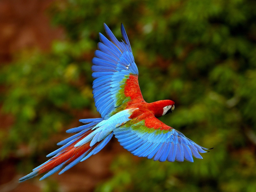

In [13]:
from fastdownload import download_url
dest = 'bird.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

Here we have downloaded and opened an image of a bird.

[fast.ai](fast.ai) provides lots of libraries. They ususlly start with `fast<something>`. For example:
* To make it easy to download URLs, `fastdownload` has `download_url`.
* To make it easy to create a thumbnail, we have `im.to_thumb()`. 

Searching for 'forest photos'


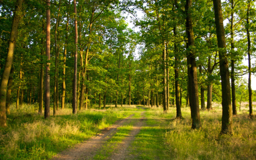

In [14]:
download_url(search_images('forest photos', max_images=1)[0], 'forest.jpg', show_progress=False)
Image.open('forest.jpg').to_thumb(256,256)

Here we have downloaded an image of a forest.

Note that we are viewing the image once it is downloaded.

Jeremy always likes to view the data at every step whenever he builds a model. This helps in making sure the data is reasonable. Once they look ok. We can download a bunch of them as follows:

In [15]:
searches = 'forest','bird'
path = Path('bird_or_not')
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    sleep(10)  # Pause between searches to avoid over-loading server
    download_images(dest, urls=search_images(f'{o} sun photo'))
    sleep(10)
    download_images(dest, urls=search_images(f'{o} shade photo'))
    sleep(10)
    resize_images(path/o, max_size=400, dest=path/o)

Searching for 'forest photo'
Searching for 'forest sun photo'
Searching for 'forest shade photo'
Searching for 'bird photo'
Searching for 'bird sun photo'
Searching for 'bird shade photo'


[fast.ai](fast.ai) has `download_images`, where if we provide a bunch of URLs, it downloads them. It does this in parallel hence very quickly.

We are using `resize_images` becuase of the following reasons:
 * In computer vision algorithms we generally don't need particularly big images. Hence we are resizing it to maximum size of `400` which makes it much faster.
 * Since, GPUs are so quick, it can take a whole lot of time to just open an image compared to a NN.

In [16]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

0

The above cell finds broken images and deletes them from the dataset.

Jeremy likes to use functional style of programming Python code because of the work he does. The use of `.map` above gives a sense of it. 

Developrs might be familiar with this.

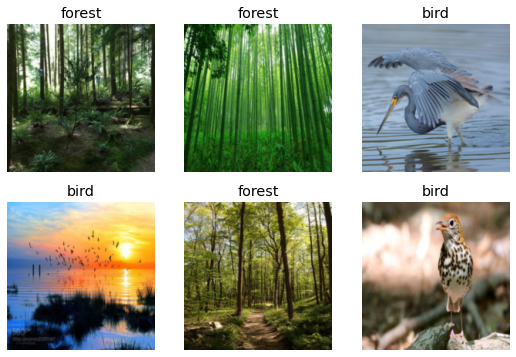

In [17]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

`DataBlock` is the main thing in this complete model. 

This is the key thing we must get familiar with as deep learning practitioners at the start of our journey.

The question to ask is simply, "How do I get my data in my model?"

This might be a surprise for the ones thinking that we must spent time in understand neural network architectures, matrix multiplication, gradient, and stuff like that. 

The truth is very little of all that comes up in practice because at this point of time in the DL world, the community have found resonably small number of models that work for nearly all the main applications we need and [fast.ai](fast.ai) will create the right type of model for us the vast majority of the time. 

We will evetually get to all that stuff about tweaking NN architectures in this course, but we will discover that it won't be of much use in practice. 

This is kind of like a similar situation of a CS student, who in a CS course is exposed to the details of compilers and operating systems, but when s/he gets into the real world, none of that is useful.

This course is **Practical** Deep Learning, hence we will focus on the practical part.

So let us get started in discussing `DataBlock`

### DataBlock

* Key thing to know if we want to know how to use *different* kinds of datasets.
* We will be providing it with the following things:
  
  ![*DataBlock*](images/lesson_1/data_block)
  
* When designing `DataBlock`, Jeremy and his team analysed all the things that changed from project to project to get the data into the right shape. They did this over hundreds of projects and came to realise that they can split it down into these 5 things.

1. `blocks`: The first thing we tell fast.ai is
  - "What kind of input we have?" There are lots of `Blocks` in fastai for various kinds of inputs. In our case we have our input as an image hence we are using `ImageBlock`
  - "What kind of output we have?" The output is a category, one of a number of possibilities. Hence, we use the `CategoryBlock`.
  
  This is enough for fast.ai to know what kind of model it needs to build for us.

2. `get_items`: The next thing to mention is what are the items that the model will be looking at to train from. We are training from images. Hence, we use `get_image_files` which is a function we saw earlier. It returns a list of all image files in a path based on extension. So whenever the model needs to find what things to train from it uses this.

3. `splitter`: It is critical to put aside some data for testing the accuracy of the model. It is called a validation set. It is so crotical that fast.ai doesn't allow us to train a model without a validation set. In this case, we *randomly* (`RandomSplitter`) ask to set aside 20% of the data.

4. `get_y`: The next question fast.ai asks is "How does it know the correct label of a photo?" i.e. how does the model know if a photo is of a bird or a forest. For that we use the `parent_folder`. It returns the parent folder of the path which was named as `bird` and `forest` by us. So that is where the model gets the labels from.

5. `item_tfms`: Finally, most computer vision architectures need all of the inputs as we train to be of the same size. `item_tfms` are all of bits of code that is going to run on every item, in this case images. We resize every one of them to being `192x192` pixels. There are two way to resize `crop` or `squish` we use `squish` it.

This wraps up `DataBlock`.

From there we create an important class called `dataloaders`. These are things PyTorch iterates through to grab bunch of our data at a time. The way it dess so fast is because its used GPUs which can do 1000s of things at a time, that means it needs 1000s of things to do. `dataloaders` feeds the training algorthim with a bunch of images at once, we call it a `batch` or a `mini_batch`

When we say `show_batch`, its a specific term in DL it means show an example of a batch of data that will be passed in the model.

it tells us two things, the inputs and the label.

Labels came by calling that `parent_folder` function.


:::{.callout-tip}
## Exploring the fast.ai documentation

When we come to building our own models, we would want to know the different kinds of splitters, label functions and so forth.

[This](docs.fast.ai) is the best place to go, specially the "Tutorials" section within it.

Start reading the documentation of something that you are familiar with.
:::

In [18]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,0.461070,0.107210,0.027523,00:02


epoch,train_loss,valid_loss,error_rate,time
0,0.036630,0.011480,0.000000,00:02
1,0.020736,0.001620,0.000000,00:02
2,0.013398,0.000982,0.000000,00:02


Now we need a model. 

The critical concept in fast.ai is a learner.

A learner is something which combines a model, the actual NN function we are training and the data we are using to train it with. Hence, we pass two things- a learner `resnet18` and and the data `dls` (which is the `DataBlocks` object.

There is a relatively small number of learners that will work for the vast majority of things we do. 

If we pass in bare symbols like `resnet18`, it uses fast.ai's built in models.

Another cool thing is that a wonderful library is integrated in fast.ai's library built by [Ross Wightman](https://twitter.com/wightmanr) called [timm](https://timm.fast.ai/). It is the largest collection of computer vision models in the world. And at this point fast.ai is the first and only framework to integrate this. 

[Here](https://rwightman.github.io/pytorch-image-models/results/) is a comprehensive list of various models with its information.

The model family called `resnet` will probably be fine for nearly any work we do, but we can use any thing from the above list.

When we run the above cell, it runs pretty fastly, in under 2 minutes. The reason is that somebody has already trained the `resnet18` model to recognize over 1 million images of 1000 different types from the [ImageNet](https://www.image-net.org/) dataset. After the training they made those weights/parameters available on the internet for anybody to download. By default on fast.ai when we use a model, it downloads those weights for us so that we don't start with a NN which can't do anything, but start with the one which can do a whole lot. Once we have this NN, a method called as *fine tuning* takes place which is unique to fast.ai. What it does it takes the pretrained weights that were downloaded by fast.ai and it adjusts them in a carefully controlled way to just teach the model the differences between our data set and what it was originally trained for. Hence the downloading happnes there. 

Reaching 100% accuracy.




In [19]:
is_bird,_,probs = learn.predict(PILImage.create('bird.jpg'))
print(f"This is a: {is_bird}.")
print(f"Probability it's a bird: {probs[0]:.4f}")

This is a: bird.
Probability it's a bird: 1.0000


In the previous step we had a leraner which started with a pretrained model and was finetuned for the purpose of our task, now we can call `.predict()` on it and we pass in an image.

This is what the deploying part is which basically achieves our goal we intended to achieve, for example, in the comic we say the person had a reason for the model, to check an image perhaps! 

---

## Beyond Image Recognition - Segmentation

### What Is It?

![*Segmentation*](images/lesson_1/segmentation)

Segmentation is where we take photos, in this case of road scenes and color the pixels based on the "things" in the photos, green for trees, brown for buildings, and so on. 

On the left we have photos were somebody has already classified the pixels and on the right, it is the model who is doing the prediction. Most of the pixels are getting correct.

### Training Gives Accurate Results

One might assume that this would be a hard task, but the above was trained for 20 sec. Training a little further could easily make it close to perfect.

### Some Code Analysis

![*Segmentation Code Snippet*](images/lesson_1/segmentation_code)

The steps look familiar as the "Is It A Bird?" model we ran, in fact in this case the code is a bit less. We are using a simler approach.

Earlier, we used `DataBlocks` which is like an intermediate level approach in handling any kind of data and it gives a lot of flexibility.

For the kinds of data that occur a lot, one can use `DataLoaders` which involves less code.

For segmentation we use a `unet` learner which will come in the next lessons.

Rest all is self explanatory and familiar stuff!

---


## Beyond Image Recognition - Tabular Analysis

### What Is It?

Stepping away from computer vision, the most widely used model in industry is the tabular analysis.

The idea is simple, we take spreadsheets or database tables and predict columns of those.

### Some Code Analysis

![*Tabular Analysis Code Snippet*](images/lesson_1/tabular_analysis_code)

Again the code has a sense of similarity.

* `untar_data()` is a fast.ai feature which *downloads* the data from a URL and *decompresses* it. There are whole lot of URLs provided by fast.ai which are the common datasets widely used in learning and research.

* We created `DataLoaders`, this time `TabularDataLoaders`.
* `cat_names` and `cont_names` helps in telling the model which colums are categorical and which ones are continuous.

![*Show Batch*](images/lesson_1/show_batch)

The exact same `show_batch` can be used to view the data. 

This is because, fast.ai uses something called "type dispatch" which is a system which popular in the Julia language. It automatically does the right thing for our data regardless of what kind of data it is.

As a general sonsolidation, when we use `show_batch` on something we will get something useful regardles of what kind of data we provided.

![*Learner*](images/lesson_1/fit_one)

For the learner we are using `tabular learner`.

Note that, this time we are not using `fine_tune`, but instead `fit`. This is because for tabular models, there will not be any pre-trained models that can do exactly what we wish to do, because every table has a different structure of data. Pictures have a similarity. Hence, it does not make too much sense to fine-tune a tabular model.

---

## Beyond Image Recognition - Collaborative Filtering

### What Is It?

This is the backbone of most recommendation systems today like Amazon, Netflix, etc.

It basically takes datasets and analysis the following:
* Which users have bought which products?
* Which products can the users be interested in based on finding similar users and they like?

By similar we mean sharing mutual interets in prodcuts but not based on demography or other parameters.

### Some Code Analysis

![*Collaborative Filtering Code Snippet 1*](images/lesson_1/collab)

We are using `ColabDataLoaders`, where we can include the data using a `csv` file.

Generally all Collab Filtering have the similar data structure shown in the batches above.

![*Collaborative Filtering Code Snippet 2*](images/lesson_1/collab0)

We are using the `collab_learner` where we pass in the data `dls` along with an additional information `y_range`. We do this becuase what we are predicting is not a catgory but a real numbers. Hence the possible range is mentioned. Note that the actual range is `1-5` but we use a range from a little bit lower to a little bit higher, that's why we used `0.5-5.5`. We will learn the reasons for this in the upcoming lessons. 

Ideally we should fit it instead of fine-tuning but it works as well in collaborative filtering.

![*show_results()*](images/lesson_1/show_results)

For any kind of models we can always call `show_results` which shows few examples.

---

## What Jeremy Makes With Jupyter NBs

* The *Deep Learning for Coders with fastai and PyTorch* textbook was written in JNs. Here is the [repo](https://github.com/fastai/fastbook).
* The entire fast.ai [library](https://docs.fast.ai/) was written in NBs. Here is the [repo](https://github.com/fastai/fastai). Since all the source codes are NBs, it has actual pictures of things that were being built.
* Blogging. Blogging is easy when done with JNs if there is lots of code involved. It displays the outputs as well, like the one you are reading now :D. [This](https://fastpages.fast.ai/jupyter/2020/02/20/test.html) blog was written in NBs.
* All of fast.ai libraries tests and continuous integration is all NBs. Every time changes are made in the NBs, multiple tests are run automatically.

---


## What Can DL Do At Present?

We are still scratching the tip of an iceberg!

Although to day it is really hyped and marketed about, in 2014 things were a bit dull:
* Not many people were talking about DL. 
* There was no accessible way to get startet with it.
* There were no pretrained models one could download.
* It was just starting to appear- some open source softwares were running on GPUs.

Despite all that DL is doing pretty well today but we are still scratching the surface.

People working in any domain who wish to use DL, months after their implementation get state of the art results in their fields.

Following are the areas in which most people have tried DL so far, still most things haven't been tried.

![*List of things DL can do*](images/lesson_1/what_can_dl_do)

![*List of things DL can do*](images/lesson_1/what_can_dl_do_2)

Jeremy has tried to make bigger lists and ended up making pages. It is spread out everywhere!

Generally speaking DL will be good at tasks that a human can do resonably quickly, like looking at a GO board and deciding if it is a good GO board or not.

If the task is something that takes lots of logical thought processes and not based on data, then DL wouldn't fit there, like deciding who would win an election.

---

## A Quick History Of DL

Dl is incredibly powerful today but it took decades of hardwork by lot of people to reach where we are today.

Below is the first neural network, the basis of DL:

![*NN back then*](images/lesson_1/nn)

The basic ideas have not changed at all, although we have extra gear at our disposal, things like GPUs, solid-state drives, and of course lots of data. 

---

## High Level Overview Of Models

Let us take a look at what is going on in a model works, and discuss the basic idea of ML from a very high level.

Following is what a normal program looks like in the pre DL/ML days:

![*A normal computer program*](images/lesson_1/program)

We have `inputs` and `results`, and a `program` coded in the middle that has bunch of conditionals, loop, and blah blah blah.

A machine learning model does not look that different:

![*A machine learning model*](images/lesson_1/ml_model)

Here:
* The `program` is replaced by a `model`.
* We don't just have `inputs` now but something called as `weights`, which are called as `parameters` as well.

The key thing being that the `model` is no longer a bunch of conditionals or loops, but is a mathematical function. 

An example is the Neural Network. Following is how it works:

It takes the inputs, multiplies it by one set of weights, and adds them up. It does this process again for a second set of weights and so on. It takes any resulting negative numbers and replaces with zeroes. It then takes these as new inputs for the next layer and repeats the whole process of multiplying and adding with the weights till the next layers.

The model does not to anything useful unless the weights are chosen carefully. To begin wiith we start by starting with some random weights. Initially it doesn;t do anything useful.

We do the following, as described in the 1950s by Arthur Samuel, the inventor of ML.

![*A machine learning model*](images/lesson_1/next_steps)

* Take the inputs and weights
* Put it in the model
* Get the results 
* Decide how good they are

For example, if we are trying to decide if a picture is of a bird or not and the model, which initially is taking a random weight said otherwise, we then calculate the `loss`. It is number which says how good the results are. We can for example say what's the accuracy.

The critical step is the "updating step" where we update the weights with a new set which is a bit better than the previous weights, by bit better we mean the loss should get a little bit better. So, we need a mechanism which does this updateing process. 

In an overall sense, if we make it a little bit better enough no of times we get what we want.

---


## Learner Backgrounds

For learners who are already familiar with NBs and Python this lesson will be easy- just using NBs and some new libraries. 

For those who do not know Python are biting at a big thing here. There will be lots to learn.

Python will not be taught in this course but there are great Python resources on the forum.

---

## HW/Things To Do Before Moving To Lesson 2

### 1. Experiment!

Regardless of where you are at, the most important thing is to **experiment**. Experimenting can mean the following:
1. Simply running the Kaggle NBs- just see them run.
2. Changing things a little bit
  * Instead of bird and forest come up with something else.
  * Instead of using only 2 categories, try to use 3 or more categories. 

Depeding on whereever you are at, try to push yourself a little bit but not too much before moving into the next lesson.

### 2. Read chapter 1 of the textbook

Chapter 1 has got much the same stuff presented in a slightly different way.

### 3. Share Your Work

One can share on [this](https://forums.fast.ai/t/share-your-work-here/96015/525) thread of the forum.

It is amazing to see learner's journeys once they begin to share their work. In the first year of the course there were 1000s of replies of learners sharing their work, and of those replies many of them had turend into many startups, scietific papers, and job offers. Some of them were just fun projects!

### 4. Have A Look At The Quiz Questions

Try to see if you can answer them all correctly

![*Figure : Share Your Work thread on forum*](images/lesson_1/share_thread)

---

## Glimspes Of Other Student's Work

The projects people do are based on where they live and what there intrerests are. Following are a few of them.

* Trinidad & Tobago Classifier:

  ![*Trinidad & Tobago Classifier*](images/lesson_1/trinidad)

* Zucchini & Cucumber Classifier:
 
  ![*Vegetable classifier project by a student*](images/lesson_1/cucumber)

* Satellite City Imagery Classifier:

  ![*Satellite city image classifier project by a student*](images/lesson_1/satellite)

* Panama City Bus Classifier:
 
  ![*Bus classifier project by a student*](images/lesson_1/bus)

* Batik Cloth Classifier:

  ![*Cloth classsifier project by a student*](images/lesson_1/batik)

* Building Safety:

  ![*Disaster management project by a student*](images/lesson_1/safety)

  This is a practicallyy important one, recognising state of the buildings. Quite a few students have moved into disaster resellience domains banes on satellite imagery.

* Sound Classification (Revisited):

  ![*Sound classification project by a student*](images/lesson_1/sound)

* Cancer Tumour:

  ![*Cancer tumout detection project by a student*](images/lesson_1/tumour)

* Fraud Detection (Revisited):

  ![*Fraud detection project by a student*](images/lesson_1/fraud)

* Envision Startup:

 ![*Envision a startup created by a student*](images/lesson_1/envision)

Have a go at building your own project and try to push a little further.